In [13]:
print("This code works!")
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram


This code works!


In [6]:
qc = QuantumCircuit(3) # Create circuit with 2 qubits
qc.h(0)    # Do H-gate on q0
qc.cx(0,1) # Do CNOT on q1 controlled by q0
qc.h(2)
qc.cz(1,2)
qc.measure_all()
qc.draw()

┌───┐         ░ ┌─┐      
   q_0: ┤ H ├──■──────░─┤M├──────
        └───┘┌─┴─┐    ░ └╥┘┌─┐   
   q_1: ─────┤ X ├─■──░──╫─┤M├───
        ┌───┐└───┘ │  ░  ║ └╥┘┌─┐
   q_2: ┤ H ├──────■──░──╫──╫─┤M├
        └───┘         ░  ║  ║ └╥┘
meas_0: ═════════════════╩══╬══╬═
                            ║  ║ 
meas_1: ════════════════════╩══╬═
                               ║ 
meas_2: ═══════════════════════╩═

In [7]:
n = 8
n_q = n
n_b = n
qc_output = QuantumCircuit(n_q,n_b)

In [8]:
for j in range(n):
    qc_output.measure(j,j)

In [9]:
qc_output.draw()

┌─┐                     
q_0: ┤M├─────────────────────
     └╥┘┌─┐                  
q_1: ─╫─┤M├──────────────────
      ║ └╥┘┌─┐               
q_2: ─╫──╫─┤M├───────────────
      ║  ║ └╥┘┌─┐            
q_3: ─╫──╫──╫─┤M├────────────
      ║  ║  ║ └╥┘┌─┐         
q_4: ─╫──╫──╫──╫─┤M├─────────
      ║  ║  ║  ║ └╥┘┌─┐      
q_5: ─╫──╫──╫──╫──╫─┤M├──────
      ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ─╫──╫──╫──╫──╫──╫─┤M├───
      ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ─╫──╫──╫──╫──╫──╫──╫─┤M├
      ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ═╩══╬══╬══╬══╬══╬══╬══╬═
         ║  ║  ║  ║  ║  ║  ║ 
c_1: ════╩══╬══╬══╬══╬══╬══╬═
            ║  ║  ║  ║  ║  ║ 
c_2: ═══════╩══╬══╬══╬══╬══╬═
               ║  ║  ║  ║  ║ 
c_3: ══════════╩══╬══╬══╬══╬═
                  ║  ║  ║  ║ 
c_4: ═════════════╩══╬══╬══╬═
                     ║  ║  ║ 
c_5: ════════════════╩══╬══╬═
                        ║  ║ 
c_6: ═══════════════════╩══╬═
                           ║ 
c_7: ══════════════════════╩═

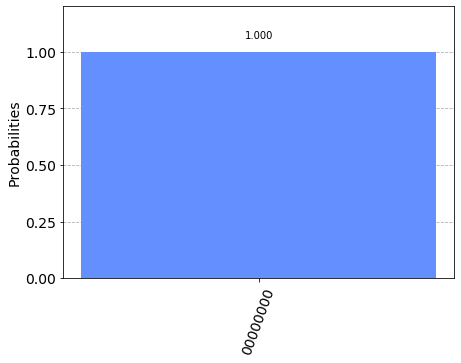

In [21]:
sim = Aer.get_backend('qasm_simulator')  # this is the simulator we'll use
qobj = assemble(qc_output)  # this turns the circuit into an object our backend can run
result = sim.run(qobj).result()  # we run the experiment and get the result from that experiment
# from the results, we get a dictionary containing the number of times (counts)
# each result appeared
counts = result.get_counts()
# and display it on a histogram
plot_histogram(counts)

In [28]:
qc_encode = QuantumCircuit(n)
qc_encode.x(7)
qc_encode.draw()

q_0: ─────
          
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
     ┌───┐
q_7: ┤ X ├
     └───┘

In [30]:
qc = qc_encode + qc_output

In [31]:
qc.draw()

┌─┐                     
q_0: ─────┤M├─────────────────────
          └╥┘┌─┐                  
q_1: ──────╫─┤M├──────────────────
           ║ └╥┘┌─┐               
q_2: ──────╫──╫─┤M├───────────────
           ║  ║ └╥┘┌─┐            
q_3: ──────╫──╫──╫─┤M├────────────
           ║  ║  ║ └╥┘┌─┐         
q_4: ──────╫──╫──╫──╫─┤M├─────────
           ║  ║  ║  ║ └╥┘┌─┐      
q_5: ──────╫──╫──╫──╫──╫─┤M├──────
           ║  ║  ║  ║  ║ └╥┘┌─┐   
q_6: ──────╫──╫──╫──╫──╫──╫─┤M├───
     ┌───┐ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
q_7: ┤ X ├─╫──╫──╫──╫──╫──╫──╫─┤M├
     └───┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
c_0: ══════╩══╬══╬══╬══╬══╬══╬══╬═
              ║  ║  ║  ║  ║  ║  ║ 
c_1: ═════════╩══╬══╬══╬══╬══╬══╬═
                 ║  ║  ║  ║  ║  ║ 
c_2: ════════════╩══╬══╬══╬══╬══╬═
                    ║  ║  ║  ║  ║ 
c_3: ═══════════════╩══╬══╬══╬══╬═
                       ║  ║  ║  ║ 
c_4: ══════════════════╩══╬══╬══╬═
                          ║  ║  ║ 
c_5: ═════════════════════╩══╬══╬═
                             ║  ║ 
c_6: ════════════════════════╩══╬═
                                ║ 
c_7: ═══════════════════════════╩═

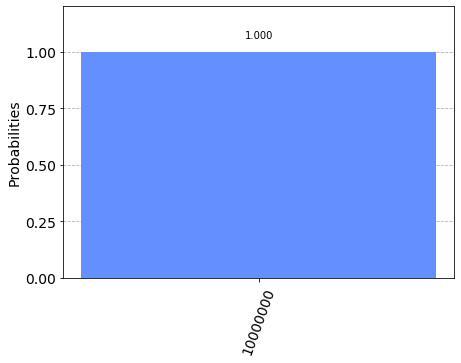

In [34]:
plot_histogram(sim.run(assemble(qc)).result().get_counts())

In [36]:
qc_adder = QuantumCircuit(1)

# input 57 (111001) + 42 (101010)
qc_adder.x(5)
qc_adder.x(4)
qc_adder.x(3)
qc_adder.x(0)

qc_adder.x(13)
qc_adder.x(11)
qc_adder.x(9)

for i in range(7):
    qc_adder

In [37]:
qc_ha = QuantumCircuit(4,2)
# encode inputs in qubits 0 and 1
qc_ha.x(0) # For a=0, remove the this line. For a=1, leave it.
qc_ha.x(1) # For b=0, remove the this line. For b=1, leave it.
qc_ha.barrier()
# use cnots to write the XOR of the inputs on qubit 2
qc_ha.cx(0,2)
qc_ha.cx(1,2)
# use ccx to write the AND of the inputs on qubit 3
qc_ha.ccx(0,1,3)
qc_ha.barrier()
# extract outputs
qc_ha.measure(2,0) # extract XOR value
qc_ha.measure(3,1) # extract AND value

qc_ha.draw()

┌───┐ ░                 ░       
q_0: ┤ X ├─░───■─────────■───░───────
     ├───┤ ░   │         │   ░       
q_1: ┤ X ├─░───┼────■────■───░───────
     └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: ──────░─┤ X ├┤ X ├──┼───░─┤M├───
           ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: ──────░───────────┤ X ├─░──╫─┤M├
           ░           └───┘ ░  ║ └╥┘
c_0: ═══════════════════════════╩══╬═
                                   ║ 
c_1: ══════════════════════════════╩═

In [39]:
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [46]:
(1 - 3.0**(-1))**0.5

0.816496580927726

In [47]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [2]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw()

┌───┐
q_0: ┤ X ├
     └───┘

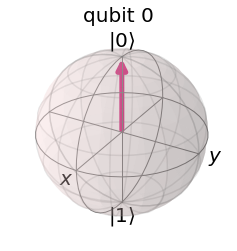

In [6]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
state = svsim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [4]:
# Run the code in this cell to see the widget
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [5]:
qc.y(0) # Do Y-gate on qubit 0
qc.z(0) # Do Z-gate on qubit 0
qc.draw()

┌───┐┌───┐┌───┐
q_0: ┤ X ├┤ Y ├┤ Z ├
     └───┘└───┘└───┘